# Problem Set 4, due March 16 at 11:59pm

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [2]:
# Load you data the Boston Housing data into a dataframe
# MEDV.txt containt the median house values and data.txt the other 13 features
# in order ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
# Your code here

from sklearn.datasets import load_boston

bdata = load_boston()
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]
boston['MEDV'] = bdata.target

---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [3]:
# Your code here

# Y: median housing price, X_RM: number of rooms per house
X_RM = np.array(boston['RM']).reshape(-1,1) # number of rooms per house
Y = np.array(boston['MEDV']).reshape(-1,1)  # median housing price

# a) Regressing the housing price on the number of rooms per house -- use sklearn.linear_models 
reg = LinearRegression().fit(X_RM, Y)
print("a) Intercept is {} and Slope is {} ".format(reg.intercept_, reg.coef_))

# b) Regressing the housing price on the number of rooms per house and the (number of rooms per house) squared
X_RM2 = np.square(X_RM)
X_regress = np.column_stack((X_RM, X_RM2))
reg2 = LinearRegression().fit(X_regress, Y)
print("b) Intercept is {} and Slopes are {}".format(reg2.intercept_, reg2.coef_))

# For interpretation of the results: 
#print('The minimum average number of rooms per house: {}'.format(min(boston['RM'])))

a) Intercept is [-34.67062078] and Slope is [[9.10210898]] 
b) Intercept is [66.05884748] and Slopes are [[-22.64326237   2.47012384]]


*Enter your observations here*

<font color='blue'>*a) The results show that the average housing price increases by \\$9.102 $\cdot$ 1000 = \\$9,102 as the number of rooms in the house increases by 1. Also, the average price of a house with 5 rooms can be calculated as \\$(-34.67062078 + 5 $\cdot$ 9.10210898) $\cdot$ 1000 = \\$10,839.92412.* 
<br/><br/> 
*b) Now, we have a quadratic term, and so the effect of a one-unit change in the (number of rooms per house) is not constant, specifically the net change in the average housing price by a one-unit increase in the (number of rooms per house) is equal to \\$(-22.64326237  + 2.47012384 $\cdot$ (2 $\cdot$ (number of rooms per house) + 1)) $\cdot$ 1000. For instance, the average change in the housing prices when the number of rooms in the house increases from 4 to 5 can be calculated as: \\$(-22.64326237 $\cdot$ (5-4) + 2.47012384 $\cdot$ (25-16)) $\cdot$ 1000 = \\$-412.14781, so we observe a decrease in the average housing price. On the other hand, the average change in the housing prices when the number of rooms in the house increases from 5 to 6 can be calculated as: \\$(-22.64326237 $\cdot$ (6-5) + 2.47012384 $\cdot$ (36-25)) $\cdot$ 1000 = \\$4,528.09987, so this time we observe an increase in the average housing price. Hence, we see that the quadratic effect of the term (number of rooms per house) results in increases in the average housing prices at an increasing rate as the number of rooms increases.*
</font> 

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 25-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 25 slope coefficients using a histogram, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

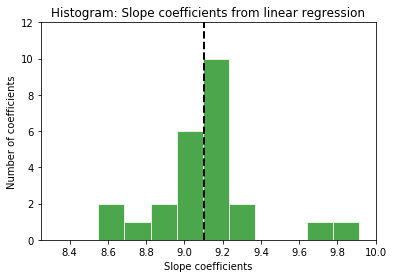

In [4]:
from sklearn.model_selection import KFold

# your code here

kf = KFold(n_splits=25)
slopes = []
for train_idx, test_idx in kf.split(X_RM):
    train_x = X_RM[train_idx]
    train_y = Y[train_idx]
    test_x = X_RM[test_idx]
    test_y = Y[test_idx]
    clf = LinearRegression().fit(train_x, train_y)
    slopes.append(clf.coef_)

slopes = np.asarray(slopes).flatten()
plt.hist(slopes, bins = 10, facecolor='g', edgecolor='white', alpha = 0.7)
plt.axis([8.25,10,0,12])
plt.xlabel("Slope coefficients")
plt.ylabel("Number of coefficients")
plt.title("Histogram: Slope coefficients from linear regression")
plt.axvline(reg.coef_, linewidth = 2, color = 'black', linestyle="dashed")
plt.show()

*Enter your observations here*

<font color='blue'>*From the histogram, we see that the most commonly observed values for the slope coefficient from the cross-validation are around the range [9.1, 9,2]. The slope coefficient that is estimated in part 1.1 is equal to 9.10210898, so that it also belongs to this range. This implies a positive insight about the accuracy of the estimation performed by LinearRegression().*
</font> 

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

Note: You can get 2 points even without the confidence bands (if the other lines are correct, the axes are labeled, the lines are labeled, the points are plotted correctly, and so forth). If you do everything perfectly including the confidence bands, you get 2 points. If you do something else wrong and would normally receive less than two points, the confidence intervals can replace lost points up to 0.5.

Useful reference: [1](https://www.medcalc.org/manual/scatter_diagram_regression_line.php), [2](https://rpubs.com/aaronsc32/regression-confidence-prediction-intervals)

You can directly use some packages to calculate the bands.

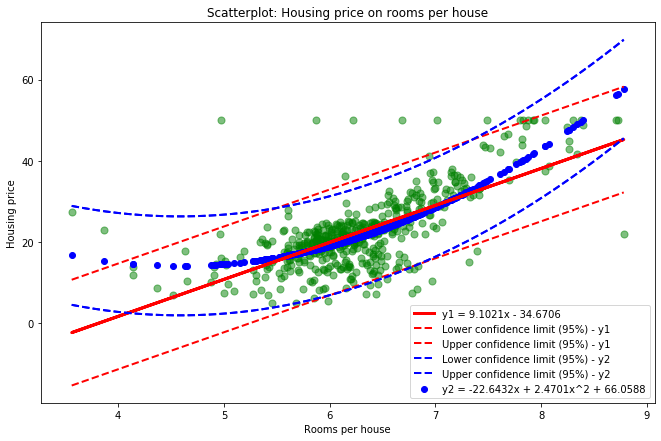

In [5]:
# Your code here
from scipy import stats

# Compute confidence bands 1
Y_hat = reg.predict(X_RM) # predict y values of original data using the fit
Y_err = Y - Y_hat # calculate the residuals
s_err = np.sum(np.power(Y_err, 2)) # sum of the squares of the residuals
nn = len(X_RM) # number of samples in origional fit
dof = nn - 1 - 1 # degrees of freedom
t = stats.t.ppf(1-0.025, df=dof) # calculate t-value for 0.95 confidence level
X_pred = np.linspace(X_RM.min(), X_RM.max(), 50).reshape(-1,1) # create new test x-values to predict for
Y_pred = reg.predict(X_pred) # prediction for new test x-values
conf = t * np.sqrt((s_err/(nn-2))*(1 + (1.0/nn) + (np.power((X_pred-X_pred.mean()),2) / 
       ((np.sum(np.power(X_pred,2))) - nn*(np.power(X_pred.mean(),2)))))) 

upper = Y_pred + abs(conf)
lower = Y_pred - abs(conf)

# Compute confidence bands 2
Y_hat2 = reg2.predict(X_regress) # predict y values of original data using the fit
Y_err2 = Y - Y_hat2 # calculate the residuals
s_err2 = np.sum(np.power(Y_err2, 2)) # sum of the squares of the residuals
nn2 = len(X_RM) # number of samples in origional fit
dof2 = nn2 - 2 - 1 # degrees of freedom
t2 = stats.t.ppf(1-0.025, df=dof2) # calculate t-value for 0.95 confidence level
X_pred2 = np.column_stack((X_pred, np.power(X_pred, 2))) # create new test x-values to predict for
Y_pred2 = reg2.predict(X_pred2) # prediction for new test x-values
conf2 = t2 * np.sqrt((s_err2/(nn2-3))*(1 + (1.0/nn2) + (np.power((X_pred2-X_pred2.mean()),2) / 
       ((np.sum(np.power(X_pred2,2))) - nn2*(np.power(X_pred2.mean(),2)))))) 

upper2 = Y_pred2 + abs(conf2)
lower2 = Y_pred2 - abs(conf2)

# Create the scatter plot 
plt.figure(figsize=(11,7))
ax = plt.subplot(111)
plt.scatter(X_RM, Y, s =50, c='green', marker = 'o', alpha=0.5)
plt.xlabel("Rooms per house")
plt.ylabel("Housing price")
plt.title("Scatterplot: Housing price on rooms per house")

plt.plot(X_RM, reg.predict(X_RM), label = "y1 = 9.1021x - 34.6706", color = 'red', linewidth = 3)

plt.scatter(X_RM, reg2.predict(X_regress), label = "y2 = -22.6432x + 2.4701x^2 + 66.0588", color = 'blue')

plt.plot(X_pred, lower,'--', label = "Lower confidence limit (95%) - y1", linewidth = 2, color = 'red')
plt.plot(X_pred, upper,'--', label = "Upper confidence limit (95%) - y1", linewidth = 2, color = 'red')

plt.plot(X_pred, lower2,'--', label = "Lower confidence limit (95%) - y2", linewidth = 2, color = 'blue')
plt.plot(X_pred, upper2,'--', label = "Upper confidence limit (95%) - y2", linewidth = 2, color = 'blue')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 4)
plt.show()


## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [6]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    
    # Initialize the parameters
    alpha_old = np.random.rand()
    beta_old = np.random.rand()
    alpha_new = np.random.rand()
    beta_new = np.random.rand()
    n = len(xvalues)
    
    # Tolerance and iteration counter
    epsilon = 1e-6
    cnt = 0    
    
    # Run the iterations 
    while(np.abs(alpha_old-alpha_new) > epsilon or np.abs(beta_old-beta_new) > epsilon):
        alpha_old = alpha_new
        beta_old = beta_new
        
        # Update rules
        vec0 = alpha_old + beta_old * xvalues - yvalues
        alpha_new = alpha_old - R / n * (vec0.sum())
        beta_new = beta_old - R / n * np.dot(xvalues.T, vec0)
        
        # Print the cost to check it is decreasing
        cost = 1.0 / (2*n) * (((alpha_new + beta_new * xvalues - yvalues) ** 2).sum())
        #print(cost)
        
        # Terminate if it takes too many iterations 
        cnt += 1
        if cnt > MaxIterations:
            print('Iterations exceeded maximum number. Stopping...')
            break       
    
    total_time = time.time() - start_time

    return alpha_new, beta_new, cnt, total_time 

# example function call
# print(bivariate_ols(X, Y, 0.01, 100000))

R_list = [0.1, 0.048, 0.01, 0.001, 0.0001]
for r in R_list: 
    intercept, slope, iters, total_time = bivariate_ols(X_RM, Y, r, 1000000000)
    print('R = {}'.format(r))
    print('Intercept is {} and slope is {} in {} iterations'.format(intercept, slope, iters))
    print("Time taken: {:.2f} seconds".format(total_time))


/Users/ilgindogan/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/ilgindogan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in square
/Users/ilgindogan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in subtract


R = 0.1
Intercept is nan and slope is [[nan]] in 621 iterations
Time taken: 0.02 seconds
R = 0.048
Intercept is -34.66888949518813 and slope is [[9.10183681]] in 17202 iterations
Time taken: 0.39 seconds
R = 0.01
Intercept is -34.662305207431764 and slope is [[9.10080173]] in 69512 iterations
Time taken: 1.47 seconds
R = 0.001
Intercept is -34.5874521642027 and slope is [[9.08903445]] in 503790 iterations
Time taken: 10.61 seconds
R = 0.0001
Intercept is -33.838925281822945 and slope is [[8.97136223]] in 3131171 iterations
Time taken: 65.65 seconds


*Enter your observations here*

<font color='blue'>  *Note the stopping condition that I have used is to checking whether both of the current parameter esimates are close to the estimates from the previous iteration up to a tolerance of epsilon = 1e-6. Also, I have included a MaxIterations parameter in the algorithm, to prevent divergence.*
  
*The different values of the learning rate R that are used in this experiment are 0.1, 0.048, 0.01, 0.001, 0.0001. The values of the coefficients alpha and beta that minimize the loss function for each value of R are reported above.*
    
*Note that the algorithm diverges for R = 0.1, i.e. the cost function progressively increases until infinity. So, I have used smaller R values and observed that the algorithm converges to the coefficient values, that are the closest ones to the values estimated in part 1.1 through standard libraries (intercept = -34.67062078, slope = 9.10210898), for R = 0.048. However, as the value of R further decreases, the converged values of the coefficients get farther away from the estimated values in part 1.1.*
<br/><br/> 
*The number of iterations and total running time (in seconds) it takes for the algorithm to converge are also reported above for each value of R. It can be seen that as the learning rate decreases, the number of iterations required for convergence and the running time increases.*
</font> 

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [7]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [8]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    # your code here
 
    start_time = time.time()

    # Initialize the parameters
    N, m = np.shape(xvalue_matrix)
    alpha_old = np.random.rand()
    alpha_new = np.random.rand()
    beta_old = np.random.rand(m)
    beta_new = np.random.rand(m)
    
    # Tolerance and iteration counter
    cost_list = np.empty(1)
    epsilon = 1e-6
    cnt = 0    
    
    # Run the iterations 
    while(np.abs(alpha_old-alpha_new) > epsilon or np.max(np.abs(beta_old-beta_new)) > epsilon):
        alpha_old = alpha_new
        beta_old = beta_new
        
        # Update rules
        vec2 = alpha_old +  np.dot(xvalue_matrix, beta_old) - yvalues
        alpha_new = alpha_old - R / N * (vec2.sum())
        beta_new = beta_old - R / N * np.dot(xvalue_matrix.T, vec2)
        
        # Print the cost to check it is decreasing
        cost = 1.0 / (2*N) * np.linalg.norm(yvalues - alpha_new - np.dot(xvalue_matrix, beta_new))**2
        cost_list= np.append(cost_list, cost)
        #print(cost)
        
        # Terminate if it takes too many iterations 
        cnt += 1
        if cnt > MaxIterations:
            print('Iterations exceeded maximum number. Stopping...')
            break   
                
    total_time = time.time() - start_time

    return alpha_new, beta_new, cnt, cost_list, total_time

R_list = [0.1, 0.01, 0.001, 0.0001]
X_CRIM_std = standardize(np.array(boston['CRIM']).reshape(-1,1)) 
X_RM_std = standardize(X_RM)
XX = np.column_stack((X_RM_std, X_CRIM_std))

for r in R_list: 
    intercept, slope, iters, cost_list, total_time = multivariate_ols(XX, Y.ravel(), r, 1000000)
    print('R = {}'.format(r))
    print('Intercept is {} and slope is {} in {} iterations'.format(intercept, slope, iters))
    print("Time taken: {:.2f} seconds".format(total_time))


R = 0.1
Intercept is 22.53280132959751 and slope is [ 5.88986822 -2.27642196] in 145 iterations
Time taken: 0.01 seconds
R = 0.01
Intercept is 22.532707445365837 and slope is [ 5.88978439 -2.27650348] in 1223 iterations
Time taken: 0.05 seconds
R = 0.001
Intercept is 22.531807744189834 and slope is [ 5.8892917  -2.27695782] in 10011 iterations
Time taken: 0.35 seconds
R = 0.0001
Intercept is 22.522807814655824 and slope is [ 5.8851899  -2.28039649] in 76835 iterations
Time taken: 3.31 seconds


### *Test (standardized) multivariate GD by LinearRegression()*

In [9]:
reg_multi = LinearRegression().fit(XX, Y)
print("Intercept is {} and Slopes are {} ".format(reg_multi.intercept_, reg_multi.coef_))

Intercept is [22.53280632] and Slopes are [[ 5.88987972 -2.27641052]] 


*Enter your observations here*

<font color='blue'>*Note the stopping condition that I have used is to checking whether all the current parameter esimates are close to the estimates from the previous iteration up to a tolerance of epsilon = 1e-6. Also, I have included a MaxIterations parameter in the algorithm, to prevent divergence.*
  
*The different values of the learning rate R that are used in this experiment are 0.1, 0.01, 0.001, 0.0001. The values of the coefficients alpha and beta that minimize the loss function for each value of R are reported above.*

*In order to test the results of the multivariate gradient descent algorithm, I have regressed the housing price on the variables CRIM and RM using LinearRegression(). It can be seen that the converged values of the coefficients are the closest ones to the estimated values through standard libraries for R = 0.1. As the learning rate further decreases, the converged values of the coefficients get farther away from the estimated values by LinearRegression().*
<br/><br/> 
*The number of iterations and total running time (in seconds) it takes for the algorithm to converge are also reported above for each value of R. It can be seen that as the learning rate decreases, the number of iterations required for convergence and the running time increases.*
</font> 

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [10]:
# Your code here

X_CRIM = np.array(boston['CRIM']).reshape(-1,1)
XX_nonstd= np.column_stack((X_RM, X_CRIM))

R_list = [0.1, 0.01, 0.001, 0.0001]
for r in R_list: 
    intercept, slope, iters, cost_list, total_time = multivariate_ols(XX_nonstd, Y.ravel(), r, 1000000)
    print('R = {}'.format(r))
    print('Intercept is {} and slope is {} in {} iterations'.format(intercept, slope, iters))
    print("Time taken: {:.2f} seconds".format(total_time))

R = 0.1
Intercept is nan and slope is [nan nan] in 330 iterations
Time taken: 0.02 seconds


/Users/ilgindogan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in subtract


R = 0.01
Intercept is -29.235797447860207 and slope is [ 8.3896816  -0.26494298] in 72599 iterations
Time taken: 3.07 seconds
R = 0.001
Intercept is -29.155483788219552 and slope is [ 8.37719932 -0.26521061] in 518576 iterations
Time taken: 48.33 seconds
Iterations exceeded maximum number. Stopping...
R = 0.0001
Intercept is -19.529226752433775 and slope is [ 6.88109464 -0.29728841] in 1000001 iterations
Time taken: 217.31 seconds


### *Test (non-standardized) multivariate GD by LinearRegression()*

In [11]:
reg_nonstd_multi = LinearRegression().fit(XX_nonstd, Y)
print("Intercept is {} and Slopes are {} ".format(reg_nonstd_multi.intercept_, reg_nonstd_multi.coef_))

Intercept is [-29.24471945] and Slopes are [[ 8.39106825 -0.26491325]] 


*Enter your observations here*

<font color='blue'>*The different values of the learning rate R that are used in this experiment are 0.1, 0.01, 0.001, 0.0001. The values of the coefficients alpha and beta that minimize the loss function for each value of R are reported above.*

*Note that the algorithm diverges for R = 0.1, i.e. the cost function progressively increases until infinity. But it converges for smaller R values. In order to test the results of the multivariate gradient descent algorithm, I have regressed the housing price on the non-standardized values of the variables CRIM and RM using LinearRegression(). It can be seen that the converged values of the coefficients are the closest ones to the estimated values through standard libraries for R = 0.01. As the learning rate further decreases, the converged values of the coefficients get farther away from the estimated values by LinearRegression(). In addition, for R = 0.0001, the algorithm terminates since the maximum number of iterations (1,000,000) is exceeded. Hence, 0.0001 seems to be an inappropriately small learning rate for this dataset.*

*The number of iterations and total running time (in seconds) it takes for the algorithm to converge are also reported above for each value of R. It can be seen that as the learning rate decreases, the number of iterations required for convergence and the running time increases. Compared with the results for standardized data, we see that the running time significantly increases when we do not standardize the data before performing regression. For instance, for R = 0.01, the algorithm converges in 0.05 seconds and in 3.07 seconds, for standardized and non-standardized data, respectively.*
</font> 

### **2.5 Implement  Mini-Batch Gradient Descent (MB-GD)**
MB-GD is a Gradient Descent variant that in large data sets can converge faster and is computationally less intensive. Implement MB-GD for question 2.3. Tune the learning rate, number of iterations and "mini-batch" size
so that you compute the estimates within a 1e-2 tolerance. Do not use a batch-size greater than 32.
In summary you go over the entire data set for n epochs. At the beginning of each epoch you shuffle your data once and then you pick k batches (approximately k=#of data points/batch_size). For each batch you compute the gradient, update the parameters and move to the next batch.
MB-GD is similar to Stochastic Gradient Descent but instead of using one sample to compute the gradient we use a batch of samples at each iteration. You can find details about MB-GD here:
https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [12]:
# Your code here
from sklearn.utils import shuffle

def multivariate_ols_minibatch(xvalue_matrix, yvalues, R=0.1, MaxIterations=1000, BatchSize = 8):  
    start_time = time.time()

    # Initialize the parameters
    N, m = np.shape(xvalue_matrix)
    alpha = np.random.rand()
    beta = np.random.rand(m)
    
    # Keep track of the objective function to determine convergence
    cost_old = np.inf
    cost_new = np.linalg.norm(yvalues)
    
    # Tolerance and iteration counter
    epsilon = 1e-6
    cnt = 0
    
    # Run the iterations 
    for i in range(MaxIterations):
        cost_old = cost_new
        
        # Shuffle data
        Xb, yb = shuffle(xvalue_matrix, yvalues)
        
        # For each of the floor(n/K) batches do gradient steps
        for offset in range(0, N, BatchSize):
            end = offset + BatchSize
            batchx, batchy = Xb[offset:end], yb[offset:end]  
            
            # Update rules
            alpha -= R / N * ((alpha + np.dot(batchx, beta) - batchy).sum())
            beta -= R / N * np.dot(batchx.T, (alpha + np.dot(batchx, beta) - batchy))         
            cost_new = 1.0 / (2*N) * np.linalg.norm(batchy - alpha - np.dot(batchx, beta))**2
                      
        # Stop if cost converges or if the number of iterations exceeds the limit 
        cnt += 1
        if((np.abs(cost_old-cost_new) < epsilon) or (cnt > MaxIterations)):
            break
    
    total_time = time.time() - start_time
        
    return alpha, beta, cnt, total_time

R_list = [0.1, 0.01, 0.001]
batchsize_list = [8, 16, 32]
X_CRIM_std = standardize(np.array(boston['CRIM']).reshape(-1,1)) 
X_RM_std = standardize(X_RM)
XX = np.column_stack((X_RM_std, X_CRIM_std))

for r in R_list: 
    for b in batchsize_list:        
        intercept, slope, iters, total_time = multivariate_ols_minibatch(XX, Y.ravel(), r, 1000000, b)
        print('R = {} and Batch Size = {}'.format(r, b))
        print('Intercept is {} and slope is {} in {} iterations'.format(intercept, slope, iters))
        print("Time taken: {:.2f} seconds".format(total_time))


R = 0.1 and Batch Size = 8
Intercept is 22.532109717433443 and slope is [ 5.89359365 -2.27487484] in 16103 iterations
Time taken: 23.81 seconds
R = 0.1 and Batch Size = 16
Intercept is 22.53801496643233 and slope is [ 5.89002514 -2.27174412] in 221493 iterations
Time taken: 167.86 seconds
R = 0.1 and Batch Size = 32
Intercept is 22.53603141914396 and slope is [ 5.88824935 -2.27212396] in 849239 iterations
Time taken: 359.31 seconds
R = 0.01 and Batch Size = 8
Intercept is 22.53291055208456 and slope is [ 5.8899428  -2.27617355] in 9570 iterations
Time taken: 13.48 seconds
R = 0.01 and Batch Size = 16
Intercept is 22.532870471467216 and slope is [ 5.88979329 -2.2761227 ] in 345022 iterations
Time taken: 271.57 seconds
R = 0.01 and Batch Size = 32
Intercept is 22.532906747335105 and slope is [ 5.88981585 -2.27619076] in 1000000 iterations
Time taken: 483.84 seconds
R = 0.001 and Batch Size = 8
Intercept is 22.532816732867165 and slope is [ 5.88987936 -2.276381  ] in 19105 iterations
Time

Enter your observations here. Did you observe speedup in the convergence?

<font color='blue'>*The different values of the learning rate R that are used in this experiment are 0.1, 0.01, 0.001, and the different number of batches that are experimented are 8, 16, 32. The values of the coefficients alpha and beta that minimize the loss function for each R value and batch size are reported above.*
    
*Recall that I have regressed the housing price on the standardized variables CRIM and RM using LinearRegression() above in part 2.3. It can be seen that the converged values of the coefficients in this part are the closest ones to the estimated values through standard libraries, that is LinearRegression(), for R = 0.001 and batch size 8.* 

*The number of iterations and total running time (in seconds) it takes for the algorithm to converge are also reported above for each R value and batch size. It can be seen that for a fixed batch size, as the learning rate decreases, the number of iterations required for convergence and the running time increases on the average. Also, for a fixed learning rate, as the batch size increases, the number of iterations required for convergence and the running time increases on the average.*
<br/><br/> 
*Comparison with batch GD: Although it is known that each iteration is faster to compute in mini-batch GD, here we observe that the number of iterations and total running time that are required for convergence of mini-batch GD are significantly higher than those of batch GD. For this specific dataset, it is probably because of the simplicity of our model, we see that batch GD is not too computationally intensive to compute anyways, and hence we do not observe speedup in the convergence.*
</font> 

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

*NOTE: * If using k-fold cross-validation, you will end up with a different set of parameters for each fold. In this case, use the parameters from the fold that has the highest test performance.

In [13]:
# Your code here
from sklearn.metrics import mean_squared_error
from math import sqrt

# Perform 10-fold CV
kf2 = KFold(n_splits=10)
slopes = np.zeros((10,2))
intercepts = np.zeros(10)
rmse_values = np.zeros(10)
i = 0
for train_idx, test_idx in kf2.split(XX):
    train_x = XX[train_idx]
    train_y = Y[train_idx]
    test_x = XX[test_idx]
    test_y = Y[test_idx]
    
    # Fit the multivariate regression
    intercepts[i], slopes[i], iters, cost_list, total_time = multivariate_ols(train_x, train_y.ravel(), 0.001, 10000000)
    
    # Test the performance 
    pred_test = intercepts[i] + np.dot(test_x, slopes[i])
    pred_test = pred_test.reshape((len(test_y), 1))
    rmse_values[i] = sqrt(mean_squared_error(test_y, pred_test))    
    i += 1 

# Find the set of parameters that has the highest test performance
min_idx = np.argmin(rmse_values)
print('Estimated coefficients from 10-fold CV for multivariate GD: Intercept = {}, Slopes = {}'
      .format(intercepts[min_idx], slopes[min_idx]))


Estimated coefficients from 10-fold CV for multivariate GD: Intercept = 22.55002134994346, Slopes = [ 5.8506884  -2.29220888]


*Discuss your results here*

<font color='blue'>*In this part, I have used 10-fold cross-validation to re-fit the multivariate regression from 2.3 above. The learning rate is 0.001. The parameters estimated from the fold that has the highest test performance, i.e. has the minimum RMSE value, are reported as: intercept = 22.5500, coefficient of RM = 5.8507 and coefficient of CRIM = -2.2921.*
</font> 

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above, predict the values for just the test instances, and compare the actual to the predicted values. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [14]:
# Your code here

print('Average RMSE across the 10 test sets: {}.'.format(np.average(rmse_values)))
print('Average RMSE from 10-fold CV for the NN algorithm from PS3 was 7.38.')


Average RMSE across the 10 test sets: 5.767975192553836.
Average RMSE from 10-fold CV for the NN algorithm from PS3 was 7.38.


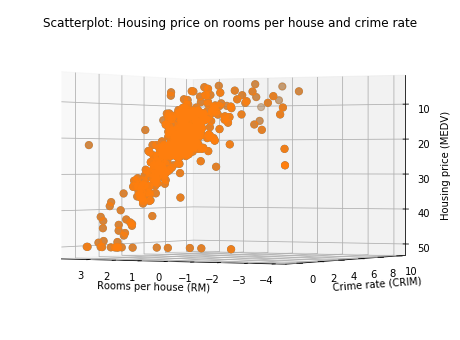

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for zlow, zhigh in [(0, 50), (0, 50)]:
    ax.scatter(X_RM_std, X_CRIM_std, Y, s =50, marker='o')

ax.set_xlabel("Rooms per house (RM)")
ax.set_ylabel("Crime rate (CRIM)")
ax.set_zlabel("Housing price (MEDV)")
plt.title("Scatterplot: Housing price on rooms per house and crime rate")
ax.view_init(-180, 60)
plt.show()

*Discuss your results here*

<font color='blue'>*As printed above, the average test RMSE obtained by 10-fold cross validation for the multivariate OLS (solved by batch gradient descent algorithm) is 5.767975 and it is significantly smaller than that of the nearest neighbor algorithm from the last problem set (which was 7.38).* 
    
*The nearest neighbor algorithm is generally expected to perform better when a complex and curved regression curve seems to fit the data better. On the other hand, OLS assumes that the response variable is well approximated by a globally linear function and it generates a single hypothesis that covers the entire instance space. In other words, it produces more generalizable and global predictions. In order to check this linearity assumption, I have plotted the 3-dimensional scatter plot above, that shows the relationship between the standardized independent variables RM and CRIM and the response variable MEDV. As can be seen, the regression curve that can fit this sample data looks like to be well approximated by a globally linear function. That might explain why the RMSE of multivariate OLS dominates the RMSE of the nearest neighbor algorithm.*
</font> 

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [21]:
# Your code here

# Create new binary column using lambda functions (dataframes)
boston['EXPENSIVE'] = boston.apply(lambda x: 1 if x['MEDV'] > 40 else 0, axis = 1)

# Define a new function for implementing multivariate logistic regression using gradient descent 
def GD_logistic(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    # your code here
 
    start_time = time.time()
    
    # Initialize the parameters
    N, m = np.shape(xvalue_matrix)
    alpha_old = np.random.rand()
    beta_old = np.random.rand(m)
    alpha_new = np.random.rand()
    beta_new = np.random.rand(m)
    
    # Tolerance and iteration counter
    epsilon = 1e-6
    cnt = 0    
    
    # Run the iterations 
    while(np.abs(alpha_old-alpha_new) > epsilon or np.max(np.abs(beta_old-beta_new)) > epsilon):
        alpha_old = alpha_new
        beta_old = beta_new

        # Update rules
        cc = np.array((alpha_old + np.dot(xvalue_matrix, beta_old)), dtype=np.float128)
        vec_1 = 1.0 /(1 + np.exp(-cc)) - yvalues
        alpha_new = alpha_old - R / N * (vec_1.sum())
        beta_new = beta_old - R / N * np.dot(np.transpose(xvalue_matrix), vec_1)
        
        # Terminate if it takes too many iterations 
        cnt += 1
        if cnt > MaxIterations:
            print('Iterations exceeded maximum number. Stopping...')
            break   
                
    total_time = time.time() - start_time

    return alpha_new, beta_new, cnt, total_time

Y_new = np.array(boston['EXPENSIVE']).reshape(-1,1)
X_CHAS = np.array(boston['CHAS']).reshape(-1,1)
X_log = np.column_stack((X_RM_std, X_CHAS))

intercept, slope, iters, total_time = GD_logistic(X_log, Y_new.ravel(), 0.00014, 100000000)
print('R = {}'.format(r))
print('Intercept is {} and slope is {} in {} iterations'.format(intercept, slope, iters))
print("Time taken: {:.2f} seconds".format(total_time))

R = 0.001
Intercept is -3.877005676968221 and slope is [1.73666337 0.78961163] in 729011 iterations
Time taken: 36.84 seconds


### *Test logistic regression using gradient descent by LogisticRegression()*

In [22]:
from sklearn.linear_model import LogisticRegression

boston['EXPENSIVE'] = boston.apply(lambda x: 1 if x['MEDV'] > 40 else 0, axis = 1)
X_log = np.column_stack((X_RM_std, X_CHAS))

reg_log = LogisticRegression().fit(X_log, np.array(boston['EXPENSIVE']))
print("Intercept is {} and Slopes are {} ".format(reg_log.intercept_, reg_log.coef_))

boston = boston.drop(columns=['EXPENSIVE'])

Intercept is [-3.86416433] and Slopes are [[1.74290872 0.72653067]] 


/Users/ilgindogan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


*Discuss your results here*

<font color='blue'>*The estimated coefficients for the logistic regression model using the batch gradient descent are reported above for the learning parameter R = 0.0001. In order to check these values, I have also regressed the variable EXPENSIVE on CHAS and RM by using LogisticRegression() from sklearn.linear_model. The estimated coefficients using the batch gradient descent can be interpreted as:* 
- *The odds ratio of being an expensive house when the house is not adjacent to the Charles River (CHAS = 0) and the average number of rooms per house is 0 (RM = 0) is equal to exp(-3.877005676968221) = 0.020712753.*
- *For a fixed value of CHAS, the expected change in log-odds of being an expensive house is 1.73666337 for one-unit increase in the number of rooms per house (RM).*
- *For a fixed number of rooms (RM), the expected change in log-odds of being an expensive house is 0.78961163 for being adjacent to the Charles River (one-unit increase in CHAS).*    
- *For an house that is adjacent to the Charles River (CHAS = 1) and has 3 rooms (RM = 3), the log-odds ratio of being an expensive house is equal to -3.877006 + 1.736663 $\cdot$ 3 + 0.789612 = 2.122596. In other words, if an house with 3 rooms is adjacent to the Charles River, then the probability that it will be an expensive house (i.e. its price will be more than \\$40,000) is 0.8931.*
- *For an house that is not adjacent to the Charles River (CHAS = 0) and has 3 rooms (RM = 3), the log-odds ratio of being an expensive house is equal to -3.877006 + 1.736663 $\cdot$ 3 = 1.332984. In other words, if an house with 3 rooms is not adjacent to the Charles River, then the probability that it will be an expensive house (i.e. its price will be more than \\$40,000) is 0.7913.*
</font> 

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [33]:
# Your code here
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# STEP 1.
# Create interaction terms 
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(bdata.data)

# Create squared terms
X2 = np.square(bdata.data)

# Combine all the features 
X_last = np.column_stack((X_inter, X2))

# Standardize all the features
X_last = standardize(X_last)

# Check the number of features
print('Step 1:')
print('K = {}'.format(np.shape(bdata.data)[1]))
print('New number of features = {}'.format(np.shape(X_last)[1]))

# STEP 2.
print('\nStep 2:')
Y_last = bdata.target
X_last_train,X_last_test,Y_last_train,Y_last_test = train_test_split(X_last, Y_last, test_size = 0.34)

print("Training and testing data sets created:")
print(X_last_train.shape, Y_last_train.shape)
print(X_last_test.shape, Y_last_test.shape)


Step 1:
K = 13
New number of features = 104

Step 2:
Training and testing data sets created:
(333, 104) (333,)
(173, 104) (173,)


### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can (Don't forget to add quadratic terms. Form instance, RM^2.).  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [34]:
## Your code here
from math import sqrt

# Train the multivariate regression model
X_overfit_train = np.column_stack((X_last_train[:, 0:3], X_last_train[:, 13:15], X_last_train[:, 91:94]))
#X_overfit_train = X_last_train[:, 0:6]
intercept, slope, iters, cost_list, total_time = multivariate_ols(X_overfit_train, Y_last_train.ravel(), 0.1, 10000000)
print('Intercept is {} and slope is {} in {} iterations'.format(intercept, slope, iters))
print("Time taken: {:.2f} seconds".format(total_time))

# Compute RMSE for training data
predicted_train = intercept + np.dot(X_overfit_train, slope)
predicted_train = predicted_train.reshape((len(Y_last_train), 1))
rmse1 = sqrt(mean_squared_error(Y_last_train, predicted_train))
print('RMSE for training data is {}'.format(rmse1))

# Compute RMSE for test data
X_overfit_test = np.column_stack((X_last_test[:, 0:3], X_last_test[:, 13:15], X_last_test[:, 91:94]))
#X_overfit_test = X_last_test[:, 0:6]
predicted_test = intercept + np.dot(X_overfit_test, slope)
predicted_test = predicted_test.reshape((len(Y_last_test), 1))
rmse2 = sqrt(mean_squared_error(Y_last_test, predicted_test))
print('RMSE for test data is {}'.format(rmse2))


Intercept is 21.93466340326126 and slope is [-72.86051354  -1.60926811  -4.89403076   1.52617071  69.18568636
   2.0096356    1.9111546    2.06456408] in 709122 iterations
Time taken: 101.15 seconds
RMSE for training data is 6.916015939740874
RMSE for test data is 8.49250884429491


*Discuss your results here*

<font color='blue'>*In this part, while training the multivariate OLS model, I have used R = 0.1. There are 8 features including 3 original features, 2 interaction features, and 3 squared terms. As reported above, the RMSE for training data is 6.9160159 and RMSE for test data is 8.4925088. As expected, the RMSE for test data is higher than the RMSE for training data because the coefficients of the fitted regression curve are calculated in order to fit well the training data. Compared to the test RMSE from part 3.2 (which was 5.767975) and the test RMSE of the nearest neighbors (which was 7.38), we see that the test RMSE of this part is much higher than the others. This is the effect of overfitting. When we add more features, although the model may fit the training set well and produce lower training RMSE values, it will fail to generalize to new examples and produce higher test RMSE values.*
</font> 

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [35]:
# Your code here

def ridge_multivariate_ols(xvalue_matrix, yvalues, R, llambda, MaxIterations=1000):
    # your code here
 
    start_time = time.time()
    
    # Initialize the parameters
    N, m = np.shape(xvalue_matrix)
    alpha_old = np.random.rand()
    alpha_new = np.random.rand()
    beta_old = np.random.rand(m)
    beta_new = np.random.rand(m)
    
    # Tolerance and iteration counter
    epsilon = 1e-6
    cnt = 0    
    
    # Run the iterations 
    while(np.abs(alpha_old-alpha_new) > epsilon or np.max(np.abs(beta_old-beta_new)) > epsilon):
        alpha_old = alpha_new
        beta_old = beta_new
        
        # Update rules
        vec3 = alpha_old +  np.dot(xvalue_matrix, beta_old) - yvalues
        alpha_new = alpha_old - R / N * (vec3.sum())
        beta_new = beta_old*(1 - R * llambda / N) - R / N * np.dot(xvalue_matrix.T, vec3)
        
        # Terminate if it takes too many iterations 
        cnt += 1
        if cnt > MaxIterations:
            print('Iterations exceeded maximum number. Stopping...')
            break   
                
    total_time = time.time() - start_time

    return alpha_new, beta_new, cnt, total_time

lambda_list = [0.001, 0.01, 0.1, 1]  
X_overfit_train2 = np.column_stack((X_last_train[:, 0:3], X_last_train[:, 13:15], X_last_train[:, 91:94]))                                                            
X_overfit_test2 = np.column_stack((X_last_test[:, 0:3], X_last_test[:, 13:15], X_last_test[:, 91:94]))
                                                             
for lamb in lambda_list:
    # Train the ridge-regularized multivariate regression model
    intercept, slope, iters, total_time = ridge_multivariate_ols(X_overfit_train2, Y_last_train.ravel(), 0.01, lamb, 100000000)
    print('Intercept is {} and slope is {} in {} iterations'.format(intercept, slope, iters))
    print("Time taken: {:.2f} seconds".format(total_time))

    # Compute RMSE for training data
    predicted_train2 = intercept + np.dot(X_overfit_train2, slope)
    predicted_train2 = predicted_train2.reshape((len(Y_last_train), 1))
    rmse3 = sqrt(mean_squared_error(Y_last_train, predicted_train2))
    print('RMSE for training data is {}'.format(rmse3))

    # Compute RMSE for test data
    predicted_test2 = intercept + np.dot(X_overfit_test2, slope)
    predicted_test2 = predicted_test2.reshape((len(Y_last_test), 1))
    rmse4 = sqrt(mean_squared_error(Y_last_test, predicted_test2))
    print('RMSE for test data is {}\n'.format(rmse4))


Intercept is 21.933989246777802 and slope is [-69.65624107  -1.54260472  -4.9000035    1.49890086  65.97114156
   2.00966743   1.87200765   2.10735852] in 4422231 iterations
Time taken: 91.64 seconds
RMSE for training data is 6.9161614434932295
RMSE for test data is 8.491216909848454

Intercept is 21.930775234316613 and slope is [-54.5950179   -1.22852822  -4.92488901   1.37070799  50.86150306
   2.00986219   1.68769452   2.30562163] in 3442532 iterations
Time taken: 71.78 seconds
RMSE for training data is 6.920494278642693
RMSE for test data is 8.48916787705881

Intercept is 21.922321191874666 and slope is [-18.28699351  -0.4599595   -4.93533985   1.06143883  14.43479341
   2.01096572   1.23856963   2.73871548] in 1066939 iterations
Time taken: 21.89 seconds
RMSE for training data is 6.955591747836084
RMSE for test data is 8.512227126707195

Intercept is 21.91131246111904 and slope is [-4.04010181 -0.03573321 -4.41107827  0.93719921  0.12710769  2.01216187
  1.01042217  2.42864554] in

*Discuss your results here*

<font color='blue'>*In this part, I used ridge regularized multivariate ols by gradient descent to re-fit the model with 8 features including 3 original features, 2 interaction features, and 3 squared terms as in the previous part. Four different values of lambda are experimented: 0.001, 0.01, 0.1, 1. The RMSE values are reported above for each lambda separately for the training and testing data. As expected, the RMSE values for training data are always smaller than the RMSE values for test data.*
    
*Note that in order to check the estimated values of the regression coefficients above, I have also performed the ridge regularized regression for all the lambda values by using Ridge() from sklearn.linear_model in the next cell below.*
<br/><br/> 
*As can be seen, the RMSE values for both training and test data increase as the value of the regularization term (lambda) increases. For lambda = 0.001, the training and test RMSE values are 6.91616 and 8.49121, respectively. However, for lambda = 1, the training and test RMSE values are 6.97968 and 8.54602, respectively.*    

*Comparison of test RMSE values: Compared to the test RMSE from part 3.2 (which was 5.767975) and the test RMSE of the nearest neighbors (which was 7.38), we see that the test RMSE values for all lambda values are much higher than the other methods. When we compare with the test RMSE from the overfitted model in part 4.2 (which was 8.492508), we see that for lambda values 0.001 and 0.01, the test RMSE values are lower in this part. This is due to the fact that we decrease the effect of overfitting the training data as we increase the lambda value. Hence, we decrease overfitting but increase the generalization of the model for new instances.* 
<br/><br/> 
*Comparison of training RMSE values: In terms of training RMSE values, as the lambda value increases, we observe that ridge regularization produces higher RMSE values for training data than the overfitted model in part 4.2 (where the training RMSE was 6.9160159). This can be explained by the fact that we perform less overfitting for the training data as we increase the regularization penalty term lambda.*
<br/><br/> 
*All of these observations can be explained more clearly as follows: When we use no penalty as we did in part 4.2, we saw that as the number of features increases, we are more likely to overfit in which case the training RMSE would be going down but the test RMSE would start going up. However, in this part, we put a penalty term so that the RMSE for test data might be smaller for certain lambda values. Note that in the cases where the penalty coefficient is (inappropriately) larger, both test and training RMSE values turn out to be higher than the other methods.*
</font> 

### *Test ridge regularized multivariate ols by Ridge()*

In [44]:
from sklearn.linear_model import Ridge

lambda_list = [0.001, 0.01, 0.1, 1]
for lamb in lambda_list:
    reg_ridge = Ridge(lamb).fit(X_overfit_train2, Y_last_train)
    print("Intercept is {} and Slopes are {} ".format(reg_ridge.intercept_, reg_ridge.coef_))
    
    # Compute RMSE for training data
    predicted_train3 = reg_ridge.intercept_ + np.dot(X_overfit_train2, reg_ridge.coef_)
    predicted_train3 = predicted_train3.reshape((len(Y_last_train), 1))
    rmse5 = sqrt(mean_squared_error(Y_last_train, predicted_train3))
    print('RMSE for training data is {}'.format(rmse5))

    # Compute RMSE for test data
    predicted_test3 = reg_ridge.intercept_ + np.dot(X_overfit_test2, reg_ridge.coef_)
    predicted_test3 = predicted_test3.reshape((len(Y_last_test), 1))
    rmse6 = sqrt(mean_squared_error(Y_last_test, predicted_test3))
    print('RMSE for test data is {}\n'.format(rmse6))


Intercept is 21.934207852659046 and Slopes are [-70.71176926  -1.56450798  -4.89779076   1.50788276  67.03004339
   2.00966047   1.88487943   2.09303953] 
RMSE for training data is 6.916083419982674
RMSE for test data is 8.49161574504831

Intercept is 21.930945202836547 and Slopes are [-55.41568034  -1.24555779  -4.92316863   1.37769133  51.68478848
   2.00985678   1.6977022    2.29448877] 
RMSE for training data is 6.9201032944175225
RMSE for test data is 8.489120474935842

Intercept is 21.922373907984994 and Slopes are [-18.54145386  -0.46523981  -4.93480642   1.06360413  14.69006705
   2.01096404   1.24167268   2.73526355] 
RMSE for training data is 6.955225434383464
RMSE for test data is 8.511945581754414

Intercept is 21.91131915267589 and Slopes are [-4.07231316 -0.03640163 -4.41101075  0.93747331  0.15942199  2.01216166
  1.01081498  2.42820858] 
RMSE for training data is 6.9796285653855135
RMSE for test data is 8.54597454253348



### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

0
1
2
3
[2.35111002 2.36253004 2.44251872 2.68209615]
[6.92151387 6.46077804 5.76732574 4.52606695]


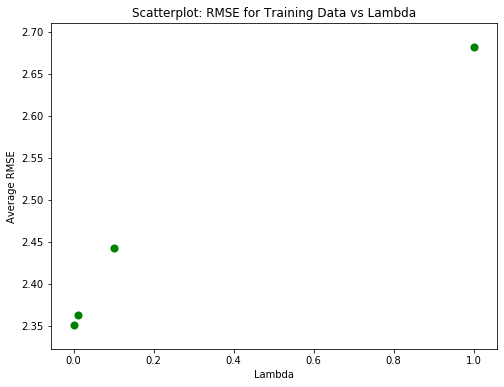

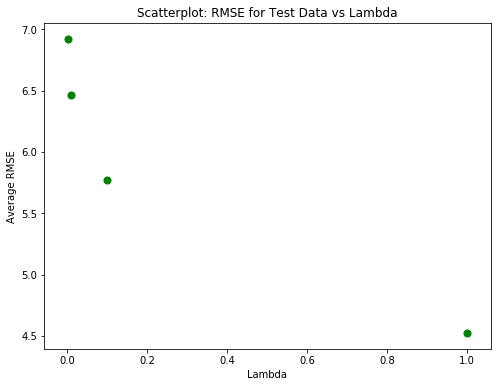

In [36]:
# Your code here

lambda_list = [0.001, 0.01, 0.1, 1]  
average_rmse_train = np.zeros(len(lambda_list))
average_rmse_test = np.zeros(len(lambda_list))
X_ridgecv = np.column_stack((X_last[:, 0:3], X_last[:, 13:15], X_last[:, 91:94]))    

j = 0
for lamb in lambda_list:    
    # Perform 10-fold CV
    print(j)
    kf3 = KFold(n_splits=10)
    rmse_values_train = np.zeros(10)
    rmse_values_test = np.zeros(10)
    i = 0
    for train_idx, test_idx in kf3.split(X_ridgecv):
        train_x = X_last[train_idx]
        train_y = Y_last[train_idx]
        test_x = X_last[test_idx]
        test_y = Y_last[test_idx]
    
        # Fit the multivariate regression
        intercept, slope, iters, total_time = ridge_multivariate_ols(train_x, train_y.ravel(), 0.01, lamb, 100000000)
    
        # Compute RMSE for training data 
        pred_train = intercept + np.dot(train_x, slope)
        pred_train = pred_train.reshape((len(train_y), 1))
        rmse_values_train[i] = sqrt(mean_squared_error(train_y, pred_train))       

        # Compute RMSE for test data 
        pred_test = intercept + np.dot(test_x, slope)
        pred_test = pred_test.reshape((len(test_y), 1))
        rmse_values_test[i] = sqrt(mean_squared_error(test_y, pred_test))
        i += 1 

    # Compute average cross-validated rmse values for training and test data 
    average_rmse_train[j] = np.mean(rmse_values_train)
    average_rmse_test[j] = np.mean(rmse_values_test)
    j += 1
       
print(average_rmse_train)
print(average_rmse_test)

plt.figure(figsize=(8,6))
ax = plt.subplot(111)
plt.scatter(lambda_list, average_rmse_train, s =50, c='green', marker = 'o')
plt.xlabel("Lambda")
plt.ylabel("Average RMSE")
plt.title("Scatterplot: RMSE for Training Data vs Lambda")
plt.show()

plt.figure(figsize=(8,6))
ax = plt.subplot(111)
plt.scatter(lambda_list, average_rmse_test, s =50, c='green', marker = 'o')
plt.xlabel("Lambda")
plt.ylabel("Average RMSE")
plt.title("Scatterplot: RMSE for Test Data vs Lambda")
plt.show()

*Discuss your results here*

<font color='blue'>*In this part, we perform 10-fold cross-validation to select the optimal value of lambda for ridge regularized multivariate ols using gradient descent. The model includes 8 features with 3 original features, 2 interaction features, and 3 squared terms as in the previous two parts. Four different values of lambda are experimented: 0.001, 0.01, 0.1, 1.* 
    
*As reported above, the average RMSE across all training and test sets for each lambda value are as follows:* 
- *lambda = 0.001 --> traning RMSE = 2.35111002, test RMSE = 6.92151387*
- *lambda = 0.01  --> traning RMSE = 2.36253004, test RMSE = 6.46077804*
- *lambda = 0.1   --> traning RMSE = 2.44251872, test RMSE = 5.76732574*
- *lambda = 1     --> traning RMSE = 2.68209615, test RMSE = 4.52606695*

*As can be also seen from the scatter plots showing the training and test RMSE values as functions of lambda, as the lambda value increases, the training RMSE increases while the test RMSE decreases. As explained in the previous part, this is due to the fact that we perform less overfitting for the training data as we increase the regularization penalty term lambda. Hence, we decrease overfitting (and so increase the training RMSE), but at the same time we increase the generalization of the model for new instances (and so decrease the test RMSE).*

*Comparison of training and test RMSE values with previous parts:*
- *Compared to the test RMSE from the overfitted model in part 4.2 (which was 8.492508) and the test RMSE of the nearest neighbors (which was 7.38), we see that the average test RMSE values for all lambda values are much lower in this part. Compared to the test RMSE from part 3.2 (which was 5.767975), we see that the test RMSE values for lambda = 0.1 and lambda =1 are lower in this part.*
- *Lastly, compared to the test RMSE values from part 4.3, we see that the average cross-validated test RMSE values for all lambda values are much lower in this part. This is because part 4.3 uses 66% of the dataset to train the model, but here we use 90% of the dataset to train the model. As a result, we also observe that the average RMSE values for training data are much smaller than the previous parts.*
</font> 

###  Extra Credit 3: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in neural network training. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. Tune the algorithm until you estimate the regression coefficients within a tolerance of 1e-1. Use mini-batch gradient descent in this implementation. In summary for each parameter (in our case one intercept and three slopes) the update step of the gradient (in this example $\beta_j$) at iteration $k$ of the GD algorithm becomes:

$$\beta_j=\beta_j -\frac{R}{\sqrt{G^{(k)}_j}}\frac{\partial J(\alpha,\beta_1,\ldots)}{\partial \beta_j}$$ where
$G^{(k)}_j=\sum_{i=1}^{k} (\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j})^2$ and $R$ is your learning rate. The notation $\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j}$ corresponds to the value of the gradient at iteration $(i)$. Essentially we are "storing" information about previous iteration gradients. Doing that we effectively decrease the learning rate slower when a feature $x_i$ is sparse (i.e. has many zero values which would lead to zero gradients). Although this method is not necessary for our regression problem, it is good to be familiar with these methods as they are widely used in neural network training.  

In [37]:
# Your code here

from sklearn.utils import shuffle
from math import sqrt

def adagrad(xvalue_matrix, yvalues, R=0.1, MaxIterations=1000, BatchSize = 8):  
    start_time = time.time()

    # Initialize the parameters
    N, m = np.shape(xvalue_matrix)
    alpha_old = np.random.rand()
    beta1_old = np.random.rand()
    beta2_old = np.random.rand()
    beta3_old = np.random.rand()
    alpha_new = np.random.rand()
    beta1_new = np.random.rand()
    beta2_new = np.random.rand()
    beta3_new = np.random.rand()

    # Keep track of the objective function 
    cost_old = np.inf
    cost_new = np.linalg.norm(yvalues)
    
    # Tolerance and iteration counter
    epsilon = 1e-6  # Tune the algorithm until you estimate the regression coefficients within a tolerance of 1e-1
    cnt = 0    
    total_grads_alpha = 0
    total_grads_beta1 = 0
    total_grads_beta2 = 0
    total_grads_beta3 = 0
    
    # Run the iterations 
    for i in range(MaxIterations):
      
        # Shuffle data
        Xb, yb = shuffle(xvalue_matrix, yvalues)
        
        # For each of the floor(n/K) batches do gradient steps
        for offset in range(0, N, BatchSize):
            cost_old = cost_new
            alpha_old = alpha_new
            beta1_old = beta1_new
            beta2_old = beta2_new
            beta3_old = beta3_new
            beta_old = np.array([beta1_old, beta2_old, beta3_old])
            end = offset + BatchSize
            batchx, batchy = Xb[offset:end], yb[offset:end]  
            
            # Update rules            
            vec_ada = alpha_old + np.dot(batchx, beta_old) - batchy
            grad_alpha = (vec_ada.sum())/N
            grad_beta = np.dot(batchx.T, vec_ada)/N
            total_grads_alpha += (grad_alpha)**2
            total_grads_beta1 += (grad_beta[0])**2 
            total_grads_beta2 += (grad_beta[1])**2 
            total_grads_beta3 += (grad_beta[2])**2     

            alpha_new = alpha_old - (R * grad_alpha / sqrt(total_grads_alpha))
            beta1_new = beta1_old - (R * grad_beta[0] / sqrt(total_grads_beta1)) 
            beta2_new = beta2_old - (R * grad_beta[1] / sqrt(total_grads_beta2))
            beta3_new = beta3_old - (R * grad_beta[2] / sqrt(total_grads_beta3))
            beta_new = np.array([beta1_new, beta2_new, beta3_new])
            
            # Update cost
            cost_new = 1.0 / (2*N) * np.linalg.norm(batchy - alpha_new - np.dot(batchx, beta_new))**2
            
        # Stop if the parameters converge or if the number of iterations exceeds the limit 
        cnt += 1
        if(((np.abs(alpha_old-alpha_new) <= epsilon) and (np.max(np.abs(beta_old-beta_new)) <= epsilon)) or (cnt > MaxIterations)):
            break
        
    total_time = time.time() - start_time
        
    return alpha_new, beta_new, cnt, total_time

X_CRIM_std = standardize(np.array(boston['CRIM']).reshape(-1,1)) 
X_DIS_std = standardize(np.array(boston['DIS']).reshape(-1,1)) 
X_RM_std = standardize(X_RM)
XX_ada = np.column_stack((X_RM_std, X_CRIM_std, X_DIS_std))

intercept, slopes, iters, total_time = adagrad(XX_ada, Y.ravel(), 0.1, 1000000, 16)
print('R = 0.1 and Batch Size = 16:')
print('Intercept is {} and slopes are {} in {} iterations'.format(intercept, slopes, iters))
print('Time taken: {:.2f} seconds'.format(total_time))


R = 0.1 and Batch Size = 16:
Intercept is 22.532812031926294 and slopes are [ 5.85583366 -2.18299623  0.2656415 ] in 95862 iterations
Time taken: 80.90 seconds


### *Test AdaGrad by LinearRegression()*

In [38]:
reg_ada = LinearRegression().fit(XX_ada, Y)
print("Intercept is {} and Slopes are {} ".format(reg_ada.intercept_, reg_ada.coef_))

Intercept is [22.53280632] and Slopes are [[ 5.85583485 -2.18302225  0.26563192]] 


*Discuss your results here*

<font color='blue'>*In this part, we implement adaptive gradient descent with different learning rates for each feature. In order to check the estimated values of the regression coefficients, I performed the same regression by using LinearRegression() from sklearn.linear_model. As reported above, they both produce almost the same values for batch size 16 and R = 0.1.* 
    
*In addition, compared to the mini-batch GD implementation in part 2.5, for the same values of batch size and R, the algorithm in part 2.5 converged in 167.86 seconds (for the model with two independent variables) while the adaptive algorithm in this part converged in 80.90 seconds (for the model with three independent variables). This shows that the adaptive approach increased the computational efficiency and convergence speed of the mini-batch GD algorithm.*
</font> 